In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### CS 484/684 Computational Vision
#### Many thanks for the design of this assignment go to <a href="https://tovacinni.github.io/" target = "_blank">Towaki Takikawa</a> and <a href="https://cs.uwaterloo.ca/~oveksler/" target = "_blank">Olga Veksler</a>

# Homework Assignment #5 - Supervised Deep Learning for Segmentation

This assignment is focused on (fully supervised) semantic segmentation. You will need to program a rudimentary CNN following some stringent constraints specified on the number and types of network layers (below). The goal is to learn some ML basics and to achieve very modest but tangible results (say above 20-25% mIOU on PASCAL validation data is OK) while using a simple design. One motivation is to encourage independent/individual efforts since widely available public code for CNN segmentation is too complex for the specified constraints. Moreover, fancy graphics cards are not required, e.g. even a modest laptop should be OK.  As a warm-up excercise, Problem 0 formulates a few simple theoretical questions. The rest is the programming part based on PyTorch. The TA(s) will hold help session(s) on PyTorch.

You can get most of the work done using only CPU, however, the use of GPU will be helpful in later parts. Programming and debugging everything upto and including problem 5c should be fine on CPU. You will notice the benefit of GPU mostly in later parts (d-h) of problem 5, but they are mainly implemenmted and test your code written and debugged earlier. If you do not have a GPU readily accesible to you, we recommend that you use Google Colaboratory to get access to a GPU. Once you are satisfied with your code upto and including 5(c), simply upload this Jupyter Notebook to Google Colaboratory to run the tests in later parts of Problem 5.

Proficiency with PyTorch is required. Working through the PyTorch tutorials will make this assignment significantly easier. https://pytorch.org/tutorials/

#### The following three parts of problem 0 are simple excersices encouraging you to review the slides on linear classification in topic 10.


# Problem 0-a

#### Consider a binary linear classifier $\sigma(W^\top X)$ for arbitrary $m$-dimentional features. Derive a formula for the distance  from an arbitrary data point $X$ to the decision boundary, hyperplane $W^\top X=0$. While the two-dimentional expression on slide 14 (Topic 10) can be used as an inspiration (it is a special case), you need to prove your expression geometrically, e.g. using standard properties of a dot product.

### Your Solution:
Using the formula that desribes the distance from a point to a plane $D = ||proj_nPQ||=\frac{|PQ\cdot n|}{||n||}$ we get:

$D = \frac{|(X-0)\cdot W|}{||W||} = \frac{|W^TX|}{||W||}$

# Problem 0-b

#### Assuming binary linear classifier $\sigma(W^\top X)$, prove that cross entropy loss is convex w.r.t the classifier parameters $W$.

#### Consider one data point $X$ and plot the cross-entropy loss as a function of logit $t=WX$ for two cases when $X$ is a positive or negative example (class 1 or class 0).

#### HINT: just plug-in the expression for sigmoid into the formula for binary cross entropy and simplify the expression w.r.t. logits $t=W^\top X$. Then, compute the second (partial) derivatives w.r.t. $W$ and prove that they are positive. It is enough to consider the loss for one data point.

#### OBSERVATION 1: in the process, you shall discover the standard expression for the "logistic regression" loss.

#### OBSERVATION 2: convexity also works for multi-class linear classifier with softmax and cross-entropy loss.

#### OBSERVATION 3: convexity and differentiability of the loss implies that properly implemented gradient descent should converge to the global minimum solution $\hat{W}$ for the linear classifier. Thus, one can obtain "the best" linear classfier similarly to how one can obtain the best line minimizing squared errors in linear regression (e.g. line fitting in assignment 1), even though there is no elegant closed-form expression similar to the standard "least squares" formulae. In practice, closed-form expressions are not that improtant. For example, evaluation of some "nice looking" closed-form expressions (e.g. using some matrix decompositions) may use complex iterative approximations algorithms.

#### OBSERVATION 4: to add a "grain of salt" to the previous observation, basic gradient descent discussed in class could be very slow to converge to the globally optimal linear clasifier. Newton's methods (using second-order approximation of the loss) is know to converge significantly faster.

### Your Solution:

Type it here, use latex for math formulas.

Loss for $y=1:$

$L(W) = -\ln(\sigma(t)) \\
= -\ln(\frac{1}{1+e^{-t}}) \\
= \ln(1+e^{-t}) \\
\frac{∂L}{∂W} = \frac{-|X|e^{-t}}{1+e^{-t}} \\
\frac{∂^2L}{∂W^2} = |X|^2e^{-t}\frac{1+e^{-t}-e^{-t}}{(1+e^{-t})^2} \\
= |X|^2e^{-t}\sigma^2(t)$



Loss for $y=0:$

$L(W) = -\ln(1-\sigma(t)) \\
= -\ln(1-\frac{1}{1+e^{-t}}) \\
= \ln(e^t+1) \\
\frac{∂L}{∂W}=\frac{|X|e^t}{e_t+1} \\
\frac{∂^2L}{∂W^2}=|X|\frac{(e^t+1)e^t|X|-|X|e^t(e^t)}{(e_t+1)^2} \\
= |X|^2e^t\frac{1}{e^t+1} \\
= |X|^2\sigma(t)(1-σ(t))$

From the second derivative wrt W for Loss y=0,1, using the knowledge that $σ>=0$, then the second derivate is positive, hence representing a convex function, meaning that W is used to minimize the loss.

# Problem 0-c

#### Consider linear soft-max classifier $\bar{\sigma}(WX)$ for two classes $K=2$ (.e.g. see topic 10), where $X\in R^{m+1}$ is a homogeneous vector representation of $m$-dimensional feature (or data point). The classifier parameters matrix $W$ consists of two rows representing  linear discriminants $W_1$ and $W_2$  in $R^{m+1}$ (including the bias). Show that soft-max classifier $\bar{\sigma}(WX)$ is equivalent to the sigmoid classifier $\sigma((W_2-W_1) X)$, e.g. see slide 48 in topic 10. Also, formulate the loss function for this sigmoid classifier that is equivalent to the cross-entropy loss  $-\ln\bar{\sigma}^y(WX)$ where the ground truth label $y$ represents either class $1$ or $2$ and $\bar{\sigma}^y$ is the corresponding component of the soft-max $\bar{\sigma}=(\bar{\sigma}^1,\bar{\sigma}^2)$.

### Your Solution:

$σ((W_2-W_1)X) = \frac{1}{1+e^{(W_1-W_2)X}} \\
= \frac{e^{W_2X}}{e^{W_2X}+e^{W_1X}}$

Similarly,  
$1-σ((W_2-W_1)X) \\ = \frac{e^{W_2X} + e^{W_1X}}{e^{W_2X}+e^{W_1X}} - \frac{e^{W_2X}}{e^{W_2X}+e^{W_1X}} \\= \frac{e^{W_1X}}{e^{W_2X}+e^{W_1X}}$

Thus $σ((W_2-W_1)X)$ can be represented as:

$
\begin{pmatrix} \frac{e^{W_1X}}{e^{W_2X}+e^{W_1X}} \\ \frac{e^{W_2X}}{e^{W_2X}+e^{W_1X}} \end{pmatrix} \\
=\bar{σ} \begin{pmatrix} W_1X \\ W_2X\end{pmatrix} \\
= \bar{σ} (WX)$

Formulating the loss function:
$L(w)=Σ_{i\in train} -(y^i-1)\ln\bar{σ}_2(WX)-(2-y_i)\ln\bar{σ}_1(WX) \\
= Σ_{i\in train} -(y^i-1)\lnσ((W_2-W_1)X)-(2-y_i)\ln(1-σ((W_2-W_1)X))$


# Programming part

In [5]:
%matplotlib inline

# It is best to start with USE_GPU = False (implying CPU). Switch USE_GPU to True only if you want to use GPU. However...
# we strongly recommend to wait until you are absolutely sure your CPU-based code works (at least on single image dataset)
USE_GPU = True #False

In [6]:
# Python Libraries
import random
import math
import numbers
import platform
import copy

# Importing essential libraries for basic image manipulations.
import numpy as np
import PIL
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from tqdm import tqdm

# We import some of the main PyTorch and TorchVision libraries used for HW4.
# Detailed installation instructions are here: https://pytorch.org/get-started/locally/
# That web site should help you to select the right 'conda install' command to be run in 'Anaconda Prompt'.
# In particular, select the right version of CUDA. Note that prior to installing PyTorch, you should
# install the latest driver for your GPU and CUDA (9.2 or 10.1), assuming your GPU supports it.
# For more information about pytorch refer to
# https://pytorch.org/docs/stable/nn.functional.html
# https://pytorch.org/docs/stable/data.html.
# and https://pytorch.org/docs/stable/torchvision/transforms.html
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as tF

# We provide our own implementation of torchvision.datasets.voc (containing popular "Pascal" dataset)
# that allows us to easily create single-image datasets
# from lib.voc import VOCSegmentation
from drive.MyDrive.CS_484.assignment_5.lib.voc import VOCSegmentation

# Note class labels used in Pascal dataset:
# 0:    background,
# 1-20: aeroplane, bicycle, bird, boat, bottle, bus, car, cat, chair, cow, diningtable, dog, horse, motorbike,
#       person, pottedplant, sheep, sofa, train, TV_monitor
# 255: "void", which means class for pixel is undefined

In [7]:
!pip install chainercv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.6/260.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chainercv: filename=chainercv-0.13.1-cp310-cp310-linux_x86_64.whl size=537293 sha256=82b0d08458033fe3719d7f37ae1a494913ba6ad648886e480f05da697b62471e
  Stored in directory: /root/.cache/pip/wheels/32/99/2a/b29c157395a5e1ee202d550011e1d11e76069ac0e89a5f4c68
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967716 sha256=5494bb4d4a5ee2db417ba90c707f6ec730d5b306997bc50e07c29684aa92097d
  Stored in directory: /root/.cache/pip/wheels/c4/95/6a/16014db6f761c4e742755b64aac60dbe142da1df6c5919f790
Successfully built chainercv chainer


In [8]:
# ChainerCV is a library similar to TorchVision, created and maintained by Preferred Networks.
# Chainer, the base library, inspired and led to the creation of PyTorch!
# Although Chainer and PyTorch are different, there are some nice functionalities in ChainerCV
# that are useful, so we include it as an excersice on learning other libraries.
# To install ChainerCV, normally it suffices to run "pip install chainercv" inside "Anaconda Prompt".
# For more detailed installation instructions, see https://chainercv.readthedocs.io/en/stable/install.html
# For other information about ChainerCV library, refer to https://chainercv.readthedocs.io/en/stable/
from chainercv.evaluations import eval_semantic_segmentation
from chainercv.datasets import VOCSemanticSegmentationDataset

In [9]:
# This colorize_mask class takes in a numpy segmentation mask,
#  and then converts it to a PIL Image for visualization.
#  Since by default the numpy matrix contains integers from
#  0,1,...,num_classes, we need to apply some color to this
#  so we can visualize easier! Refer to:
#  https://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.Image.putpalette
palette = [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128,
           128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128,
           64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128]

def colorize_mask(mask):
    new_mask = Image.fromarray(mask.astype(np.uint8)).convert('P')
    new_mask.putpalette(palette)

    return new_mask

100%|██████████| 1999639040/1999639040 [00:11<00:00, 179576072.99it/s]


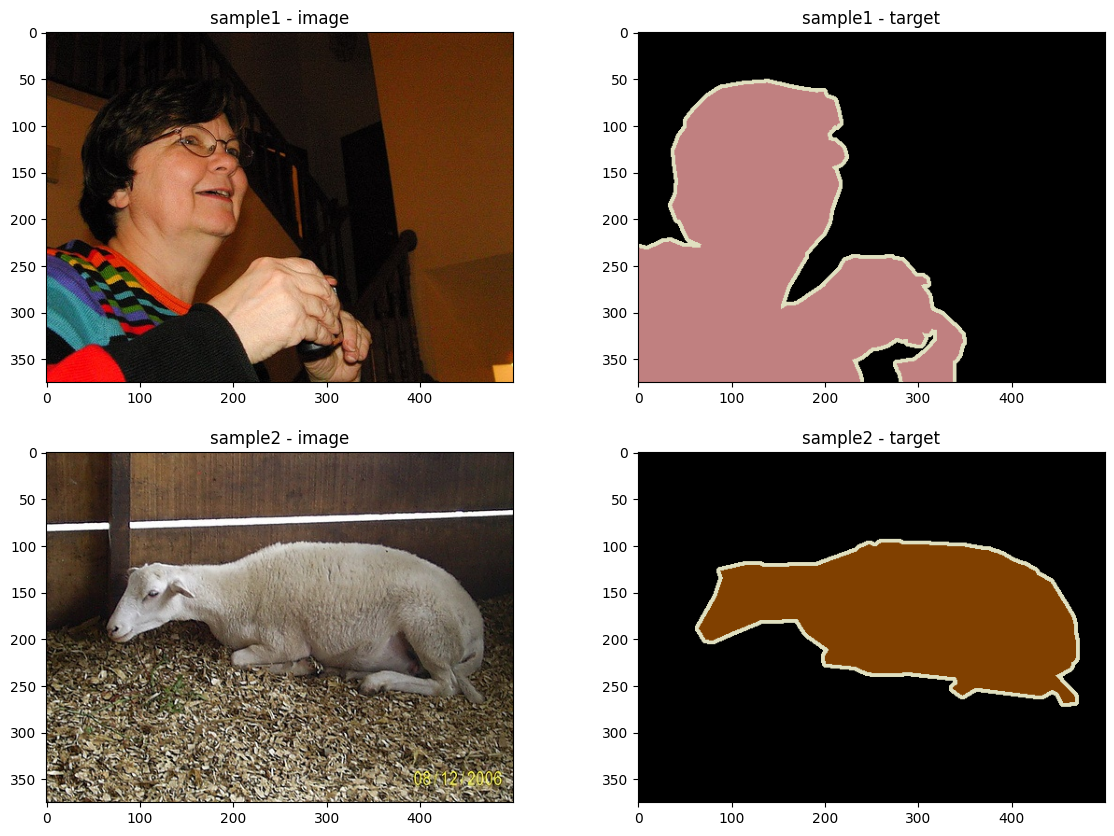

In [10]:
# Below we will use a sample image-target pair from VOC training dataset to test your joint transforms.
# Running this block will automatically download the PASCAL VOC Dataset (3.7GB) to DATASET_PATH if "download = True".
# The code below creates subdirectory "datasets" in the same location as the notebook file, but
# you can modify DATASET_PATH to download the dataset to any custom directory. Download takes a few minutes.
# On subsequent runs you may save time by setting "download = False" (the default value of this flag)

DATASET_PATH = 'datasets'

# Here, we obtain and visualize one sample (img, target) pair from VOC training dataset and one from validation dataset.
# Note that operator [...] extracts the sample corresponding to the specified index.
# Also, note the parameter download = True. Set this to False after you download to save time on later runs.
sample1 = VOCSegmentation(DATASET_PATH, image_set='train', download = True)[200]
sample2 = VOCSegmentation(DATASET_PATH, image_set='val')[20]

# We demonstrate two different (equivalent) ways to access image and target inside the samples.
img1, target1 = sample1
img2 = sample2[0]
target2 = sample2[1]

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
plt.title('sample1 - image')
ax1.imshow(img1)
ax2 = fig.add_subplot(2,2,2)
plt.title('sample1 - target')
ax2.imshow(target1)
ax3 = fig.add_subplot(2,2,3)
plt.title('sample2 - image')
ax3.imshow(img2)
ax4 = fig.add_subplot(2,2,4)
plt.title('sample2 - target')
ax4.imshow(target2)

# Problem 1

#### Implement a set of "Joint Transform" functions to perform data augmentation in your dataset.

Neural networks are typically applied to transformed images. There are several important reasons for this:

1. The image data should is in certain required format (i.e. consistent spacial resolution to batch). The images should also be normalized and converted to the "tensor" data format expected by pytorch libraries.

2. Some transforms are used to perform randomized image domain transformations with the purpose of "data augmentation".

In this exercise, you will implement a set of different transform functions to do both of these things. Note that unlike classification nets, training semantic segmentation networks requires that some of the transforms are applied to both image and the corresponding "target" (Ground Truth segmentation mask). We refer to such transforms and their compositions as "Joint". In general, your Transform classes should take as the input both the image and the target, and return a tuple of the transformed input image and target. Be sure to use critical thinking to determine if you can apply the same transform function to both the input and the output.

For this problem you may use any of the `torchvision.transforms.functional` functions. For inspiration, refer to:
#### https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
#### https://pytorch.org/docs/stable/torchvision/transforms.html#module-torchvision.transforms.functional

#### Example 1

This class takes a img, target pair, and then transform the pair such that they are in `Torch.Tensor()` format.

#### Solution:

In [11]:
class JointToTensor(object):
    def __call__(self, img, target):
        return tF.to_tensor(img), torch.from_numpy(np.array(target.convert('P'), dtype=np.int32)).long()

In [12]:
# Check the transform by passing the image-target sample.

JointToTensor()(*sample1)

(tensor([[[0.0431, 0.0510, 0.0353,  ..., 0.3137, 0.3725, 0.3569],
          [0.0196, 0.0431, 0.0235,  ..., 0.3255, 0.3608, 0.3294],
          [0.0392, 0.0510, 0.0471,  ..., 0.3333, 0.3843, 0.3608],
          ...,
          [0.9412, 0.9922, 1.0000,  ..., 0.9647, 0.9725, 0.9725],
          [1.0000, 0.9686, 0.9961,  ..., 0.9608, 0.9647, 0.9686],
          [1.0000, 0.9490, 1.0000,  ..., 0.9725, 0.9725, 0.9804]],
 
         [[0.0392, 0.0471, 0.0196,  ..., 0.1176, 0.1765, 0.1608],
          [0.0157, 0.0392, 0.0078,  ..., 0.1294, 0.1608, 0.1333],
          [0.0353, 0.0471, 0.0314,  ..., 0.1333, 0.1725, 0.1608],
          ...,
          [0.0157, 0.0706, 0.0706,  ..., 0.6549, 0.6588, 0.6588],
          [0.0784, 0.0431, 0.0667,  ..., 0.6510, 0.6510, 0.6549],
          [0.0745, 0.0235, 0.0784,  ..., 0.6627, 0.6627, 0.6706]],
 
         [[0.0314, 0.0392, 0.0157,  ..., 0.0118, 0.0706, 0.0549],
          [0.0078, 0.0314, 0.0039,  ..., 0.0235, 0.0549, 0.0275],
          [0.0275, 0.0392, 0.0275,  ...,

#### Example 2:

This class implements CenterCrop that takes an img, target pair, and then apply a crop about the center of the image such that the output resolution is $\mbox{size} \times \mbox{size}$.

#### Solution:

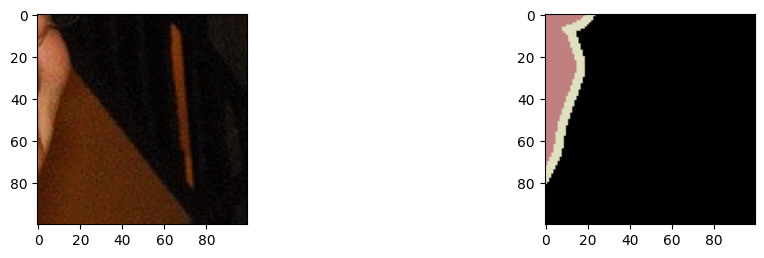

In [13]:
class JointCenterCrop(object):
    def __init__(self, size):
        """
        params:
            size (int) : size of the center crop
        """
        self.size = size

    def __call__(self, img, target):
        return (tF.five_crop(img, self.size)[4],
                tF.five_crop(target, self.size)[4])

img, target = JointCenterCrop(100)(*sample1)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(target)

#### (a) Implement RandomFlip

This class should take a img, target pair and then apply a horizontal flip across the vertical axis at random.

#### Solution:

(500, 375)


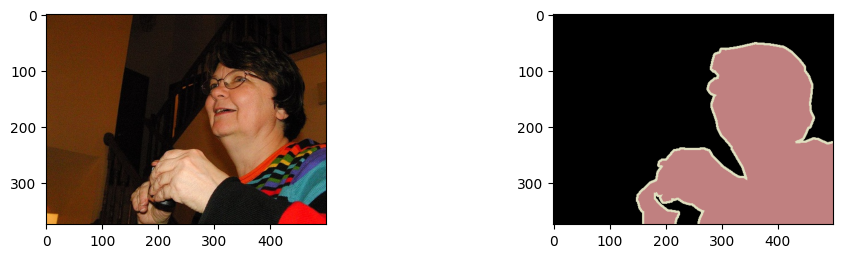

In [14]:
class JointRandomFlip(object):
  def __call__(self, img, target):
    return tF.hflip(img), tF.hflip(target)

img, target = JointRandomFlip()(*sample1)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(target)

print(img.size)

#### (b) Implement RandomResizeCrop

This class should take a img, target pair and then resize the images by a random scale between $[\mbox{minimum_scale}, \mbox{maximum_scale}]$, crop a random location of the image by $\min(\mbox{size}, \mbox{image_height}, \mbox{image_width})$ (where the size is passed in as an integer in the constructor), and then resize to $\mbox{size} \times \mbox{size}$ (again, the size passed in). The crop box should fit within the image.

#### Solution:

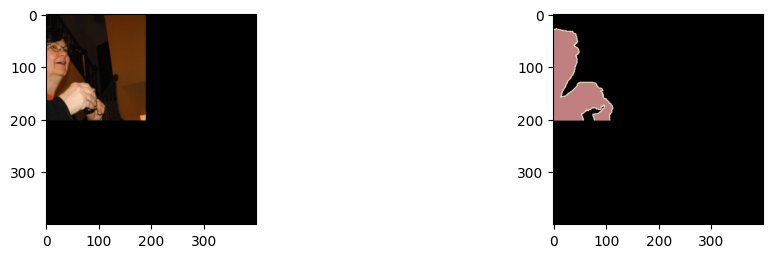

In [15]:
class JointRandomResizeCrop(object):
  def __init__(self, size, minimum_scale, maximum_scale):
    self.size = size
    self.minimum_scale = minimum_scale
    self.maximum_scale = maximum_scale

  def __call__(self, img, target):
    scale = random.uniform(self.minimum_scale, self.maximum_scale)
    image_width, image_height = img.size
    width = int(image_width * scale)
    height = int(image_height * scale)
    img = tF.resize(img, (height, width))
    target = tF.resize(target, (height, width))

    crop_width = min(self.size, image_width)
    crop_height = min(self.size, image_height)

    crop_x = random.randint(0, image_width - crop_width)
    crop_y = random.randint(0, image_height - crop_height)

    img = tF.crop(img, crop_y, crop_x, crop_height, crop_width)
    target = tF.crop(target, crop_y, crop_x, crop_height, crop_width)
    img = tF.resize(img, (self.size, self.size))
    target = tF.resize(target, (self.size, self.size))
    return img, target

img, target = JointRandomResizeCrop(400, 0.5, 1.5)(*sample1)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(target)


#### (c) Implement Normalize

This class should take a img, target pair and then normalize the images by subtracting the mean and dividing variance.

#### Solution:

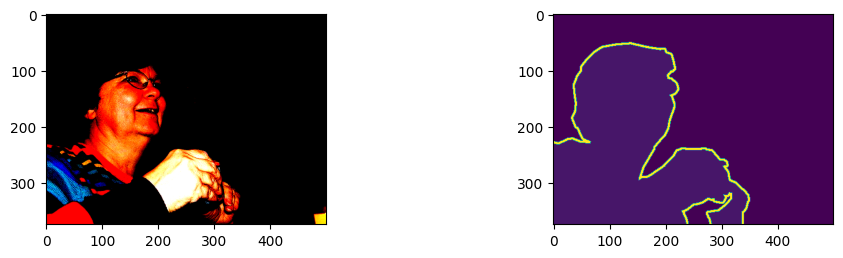

In [16]:
norm = ([0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225])

class JointNormalize(object):
  def __init__(self, mean, std):
    self.mean = mean
    self.std = std

  def __call__(self, img, target):
    return tF.normalize(img, self.mean, self.std), target

tensor = JointToTensor()(*sample1)
img, target = JointNormalize(norm[0], norm[1])(*tensor)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img.permute(1,2,0))
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(target)

#### (d) Compose the transforms together:
##### Use `JointCompose` (fully implemeted below) to compose the implemented transforms together in some random order. Verify the output makes sense and visualize it.

In [17]:
# This class composes transofrmations from a given list of image transforms (expected in the argument). Such compositions
# will be applied to the dataset during training. This cell is fully implemented.

class JointCompose(object):
    def __init__(self, transforms):
        """
        params:
           transforms (list) : list of transforms
        """
        self.transforms = transforms

    # We override the __call__ function such that this class can be
    # called as a function i.e. JointCompose(transforms)(img, target)
    # Such classes are known as "functors"
    def __call__(self, img, target):
        """
        params:
            img (PIL.Image)    : input image
            target (PIL.Image) : ground truth label
        """
        assert img.size == target.size
        for t in self.transforms:
            img, target = t(img, target)
        return img, target

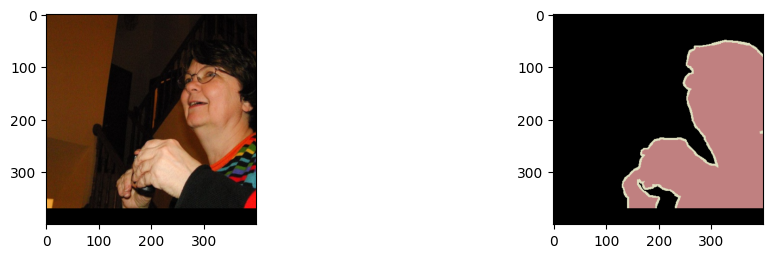

In [18]:
# Student Answer:
transforms = [JointRandomFlip(), JointRandomResizeCrop(400, 0.5, 1.5)]
img, target = JointCompose(transforms)(*sample1)

img, target = JointCompose(transforms)(*sample1)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(target)

#### (e) Compose the transforms together: use `JointCompose` to compose the implemented transforms for:
#### 1. A sanity dataset that will contain 1 single image. Your objective is to overfit on this 1 image, so choose your transforms and parameters accordingly.
#### 2. A training dataset that will contain the training images. The goal here is to generalize to the validation set, which is unseen.
#### 3. A validation dataset that will contain the validation images. The goal here is to measure the 'true' performance.

In [19]:
# Student Answer:

# sanity_joint_transform =

# train_joint_transform =

# val_joint_transform =

sanity_joint_transform = JointCompose([
    JointToTensor(),
    JointNormalize(norm[0], norm[1]),
])

train_joint_transform = JointCompose([
    JointRandomFlip(),
    JointRandomResizeCrop(400, 0.5, 1.5),
    JointToTensor(),
    JointNormalize(norm[0], norm[1])])

val_joint_transform = JointCompose([
    JointToTensor(),
    JointNormalize(norm[0], norm[1])
])


This code below will then apply `train_joint_transform` to the entire dataset.

In [20]:
# Apply the Joint-Compose transformations above to create three datasets and the corresponding Data-Loaders.
# This cell is fully implemented.

# This single image data(sub)set can help to better understand and to debug the network training process.
# Optional integer parameter 'sanity_check' specifies the index of the image-target pair and creates a single image dataset.
# Note that we use the same image (index=200) as used for sample1.
sanity_data = VOCSegmentation(
    DATASET_PATH,
    image_set = 'train',
    transforms = sanity_joint_transform,
    sanity_check = 200
)

# This is a standard VOC data(sub)set used for training semantic segmentation networks
train_data = VOCSegmentation(
    DATASET_PATH,
    image_set = 'train',
    transforms = train_joint_transform
)

# This is a standard VOC data(sub)set used for validating semantic segmentation networks
val_data = VOCSegmentation(
    DATASET_PATH,
    image_set='val',
    transforms = val_joint_transform
)

# Increase TRAIN_BATCH_SIZE if you are using GPU to speed up training.
# When batch size changes, the learning rate may also need to be adjusted.
# Note that batch size maybe limited by your GPU memory, so adjust if you get "run out of GPU memory" error.
TRAIN_BATCH_SIZE = 4

# If you are NOT using Windows, set NUM_WORKERS to anything you want, e.g. NUM_WORKERS = 4,
# but Windows has issues with multi-process dataloaders, so NUM_WORKERS must be 0 for Windows.
NUM_WORKERS = 0

sanity_loader = DataLoader(sanity_data, batch_size=1, num_workers=NUM_WORKERS, shuffle=False)
train_loader = DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1, num_workers=NUM_WORKERS, shuffle=False)

# Problem 2

#### (a) Implement encoder/decoder segmentation CNN using PyTorch.

You must follow the general network architecture specified in the image below. Note that since convolutional layers are the main building blocks in common network architectures for image analysis, the corresponding blocks are typically unlabeled in the network diagrams. The network should have 5 (pre-trained) convolutional layers (residual blocks) from "resnet" in the encoder part, two upsampling layers, and one skip connection. For the layer before the final upsampling layer, lightly experiment with some combination of Conv, ReLU, BatchNorm, and/or other layers to see how it affects performance.   
<img src="images\deeplabv2_overview.png">
You should choose specific parameters for all layers, but the overall structure should be restricted to what is shown in the illustration above. For inspiration, you can refer to papers in the citation section of the following link to DeepLab (e.g. specific parameters for each layer): http://liangchiehchen.com/projects/DeepLab.html. The first two papers in the citation section are particularly relevant.

In your implementation, you can use a base model of choice (you can use `torchvision.models` as a starting point), but we suggest that you learn the properties of each base model and choose one according to the computational resources available to you.

##### Note: do not apply any post-processing (such as DenseCRF) to the output of your net.

#### Solution:


In [21]:
import torchvision.models as models

class MyNet(nn.Module):
    def __init__(self, num_classes, criterion=None):
        super(MyNet, self).__init__()

        # Implement me
        self.criterion = criterion
        self.num_classes = num_classes

        self.resnet = models.resnet18(pretrained=True)
        self.conv1 = nn.Conv2d(576, 256, kernel_size=3, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(256)
        self.relu1 = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)

        self.conv3 = nn.Conv2d(128, num_classes, kernel_size=3, stride=1, padding=0)
        self.relu3 = nn.ReLU(inplace=True)


    def forward(self, inp, gts=None):

        # Implement me
        X = self.resnet.conv1(inp)
        X = self.resnet.bn1(X)
        X = self.resnet.relu(X)
        X = self.resnet.maxpool(X)

        X = self.resnet.layer1(X)
        X_copy = X.clone()
        X = self.resnet.layer2(X)



        X = self.resnet.layer3(X)
        X = self.resnet.layer4(X)

        X = F.interpolate(X, size=(X_copy.shape[2], X_copy.shape[3]), mode='bilinear')
        X = torch.cat((X, X_copy), dim=1)

        X = self.conv1(X)
        X = self.bn1(X)
        X = self.relu1(X)

        X = self.conv2(X)
        X = self.bn2(X)
        X = self.relu2(X)

        X = self.conv3(X)
        X = self.relu3(X)

        X = F.interpolate(X, size=(inp.shape[2], inp.shape[3]), mode='bilinear')

        lfinal = X

        if self.training:
            # Return the loss if in training mode
            return self.criterion(lfinal, gts)
        else:
            # Return the actual prediction otherwise
            return lfinal




#### (b) Create UNTRAINED_NET and run on a sample image

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 31.3MB/s]


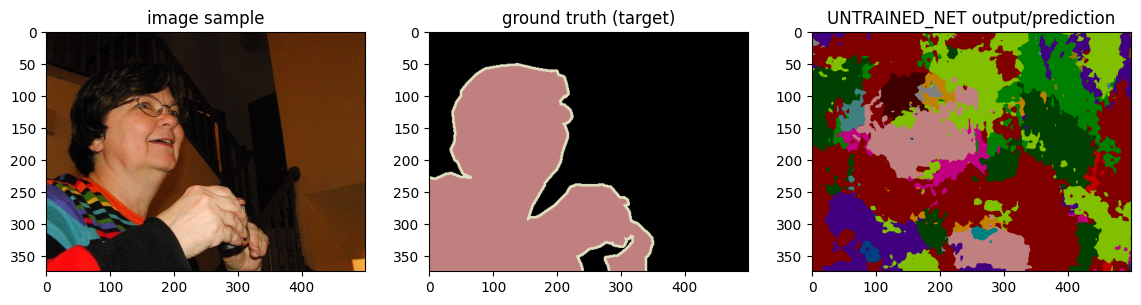

In [22]:
untrained_net = MyNet(21).eval()
sample_img, sample_target = JointNormalize(*norm)(*JointToTensor()(*sample1))
untrained_output = untrained_net.forward(sample_img[None])

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1,3,1)
plt.title('image sample')
ax.imshow(sample1[0])
ax = fig.add_subplot(1,3,2)
plt.title('ground truth (target)')
ax.imshow(sample1[1])
ax = fig.add_subplot(1,3,3)
plt.title('UNTRAINED_NET output/prediction')
ax.imshow(colorize_mask(torch.argmax(untrained_output, dim=1).numpy()[0]))

# NOTE: prediction uses argMax for the class logits produced by the last layer of the network

# Problem 3 (<font color="red">bonus for undergrads, required for grads</font>)

#### (a) Implement the loss function (Cross Entropy Loss) as detailed below. For debugging, part (b) below allows to compare the values w.r.t. the standard function "nn.CrossEntropyLoss". If your loss function works, uncomment the use of "MyCrossEntropyLossy" replacing "nn.CrossEntropyLoss" everywhere below in the notebook (just a couple of places).

You should return the mean (average over all batch pixels) negative log of soft-max for the ground truth class. Assuming that  
$X_p^m$ are logits at pixel $p$ for $C$ classes, so that $m\in\{0,1,...,C-1\}$, each point $p$ contributes to this loss $$ -\log\frac{e^{X_p^{y_p}}}{\sum_m e^{X_p^m}}\;\;=\;\;-\sum_k Y_p^k \log\frac{e^{X_p^k}}{\sum_m e^{X_p^m}} \quad\quad\quad\quad(*)$$ where $y_p$ is the ground truth label and $Y_p^k$ is the corresponding one-hot distribution. You should implement the basic math, as in one of the equations above.

NOTE 1: Numerically robust implementation of soft-max is not immediately straightforward. Indeed, logits $X_p^k$ are arbitrary numbers and their exponents could be astronomically large. While the log cancels out the exponent in the enumerator (do it mathematically, not numerically), the sum of exponents in the denominator can not be easily simplified and this is where the numerical issues hide. A naive implementation adding huge values of logits' exponents easily loses precision. Instead, one should use the right hand side in the following algebraically equivalent formulation: $$\log (e^A + e^B + \dots + e^Z) \;\;\equiv\;\; \mu + \log (e^{A-\mu} + e^{B-\mu} + \dots + e^{Z-\mu})$$ where $\mu := \max\{A,B,\dots,Z\}$. The right hand side is numerically stable since the arguments of the exponents are negative and the exponents are all bounded by value $1$.


HINT 1: Similarly to many previous assignemnts, avoid for-loops. In fact, you should not use none below. Instead, use standard  opertors or functions for tensors/matrices (e.g. pointwise addition, multiplication, etc.) In particular, you will find useful functions like "sum" and "max" that could be applied along any specified dimension of the tensor. Of course, torch also has pointwise functions "log" and "exp" that could be applied to any tensor.

HINT 2: Be careful - you will have to work with tensors of different shapes, e.g. even input tensors "targets" and "logits" have different shapes. As in previous assignments based on "numpy", you should pay attention to tensors' dimensions in pyTorch. For example, pointwise addition or multiplication requires either the same shape or shapes "brodcastable" to the same shape (similar in "pyTorch" and "numpy", e.g. see <a href="https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy">here</a>). If in doubt, use $$print(xxx.size())$$ to check the shape - I always do! If needed, modify the shapes using standard functions: "transpose" to change the order of the dimentions, "reshape", "flatten", or "squeeze" to remove dimensions, "unsqueeze" to add dimentions. You can use other standard ways to modify the shape, or rely on broadcasting.

HINT 3: Your loss should be averaged only over pixels that have non-void labels. That is, exclude pixels with "ignore index" labels. For example, you can compute a "mask" of non-void pixels, and use it to trim non-void pixels in both the "targets" and "logits". You might get an inspiration from the "mask" in your K-means implementation.

HINT 4: For simplicity, you may "flatten" all tensors' dimensions corresponding to batches and image width & height. The loss computation does not depend on any information in these dimentions and all (non-void) pixels contribute independently based on their logits and ground truth labels (as in the formula above).

HINT 5: In case you want to use the right-hand-size in $(*)$, you can use the function "torch.nn.functional.one_hot" to convert a tensor of "target" class labels (integers) to the tesnor of one-hot distributions. Note that this adds one more dimension to the tensor. In case you want to implement the left-hand-side of $(*)$, you can use the function "torch.gather" to select the ground truth class logits $X_p^{y_p}$.

HINT 6: Just as some guidence, a good solution should be around ten lines of "basic" code, or less.

In [23]:
# Student Answer:
class MyCrossEntropyLoss(object):

    def __init__(self, ignore_index=255):
        self.ignore_index = ignore_index

    def __call__(self, logits, targets):

        # N - batch size, C - number of classes (excluding void), HxW - image size
        N, C, H, W = logits.size()

        # print(logits.size())
        # print(targets.size())

        return 0

#### (b) Compare against the existing CrossEntropyLoss function on your sample output from your neural network.

In [24]:
criterion = nn.CrossEntropyLoss(ignore_index=255)

print(criterion(untrained_output, sample_target[None]))

my_criterion = MyCrossEntropyLoss(ignore_index=255)

print(my_criterion(untrained_output, sample_target[None]))


tensor(3.0414, grad_fn=<NllLoss2DBackward0>)
0


# Problem 4

#### (a) Use standard function `eval_semantic_segmentation` (already imported from chainerCV) to compute "mean intersection over union" for the output of UNTRAINED_NET on sample1 (`untrained_output`) using the target for sample1. Read documentations for function  `eval_semantic_segmentation` to properly set its input parameters.

In [25]:
# Write code to propely compute 'pred' and 'gts' as arguments for function 'eval_semantic_segemntation'

# pred =
# gts =
pred = torch.argmax(untrained_output, dim=1).numpy()[0]
gts = sample_target.numpy()

conf = eval_semantic_segmentation(pred[None], gts[None])

print("mIoU for the sample image / ground truth pair: {}".format(conf['miou']))

mIoU for the sample image / ground truth pair: 0.01042900247283287


/usr/local/lib/python3.10/dist-packages/chainercv/evaluations/eval_semantic_segmentation.py:91: RuntimeWarning: invalid value encountered in divide
  iou = np.diag(confusion) / iou_denominator
/usr/local/lib/python3.10/dist-packages/chainercv/evaluations/eval_semantic_segmentation.py:168: RuntimeWarning: invalid value encountered in divide
  class_accuracy = np.diag(confusion) / np.sum(confusion, axis=1)


#### (b) Write the validation loop.

In [26]:
def validate(val_loader, net):

    iou_arr = []
    criterion = nn.CrossEntropyLoss(ignore_index=255)
    with torch.no_grad():
        for i, data in enumerate(val_loader):

            inputs, masks = data

            if USE_GPU:
                # Write me
                inputs = inputs.cuda()
                masks = masks.cuda()
                network = net.cuda()
            else:
                inputs = inputs.cpu()
                masks = masks.cpu()
                network = net.cpu()

            # Write me
            output = network(inputs)
            val_loss = criterion(output, masks)
            preds = torch.argmax(output, dim=1).cpu().numpy()

            gts = torch.from_numpy(np.array(masks.cpu(), dtype=np.int32)).long().numpy()
            gts[gts == 255] = -1

            # Hint: make sure the range of values of the ground truth is what you expect

            conf = eval_semantic_segmentation(preds, gts)

            iou_arr.append(conf['miou'])

    return val_loss, (sum(iou_arr) / len(iou_arr))

#### (c) Run the validation loop for UNTRAINED_NET against the sanity validation dataset.

In [27]:
%%time
print("mIoU over the sanity dataset:{}".format(validate(sanity_loader, untrained_net)[1]))

mIoU over the sanity dataset:0.011233300941850908
CPU times: user 233 ms, sys: 186 ms, total: 419 ms
Wall time: 1.6 s


# Problem 5

#### (a) Define an optimizer to train the given loss function.

Feel free to choose your optimizer of choice from https://pytorch.org/docs/stable/optim.html.


In [28]:
def get_optimizer(net):
    # Write me
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return optimizer




#### (b) Write the training loop to train the network.


In [29]:
def train(train_loader, net, optimizer, loss_graph):

    for i, data in enumerate(train_loader):

        inputs, masks = data

        if USE_GPU:
            # Write me
            inputs = inputs.cuda()
            masks = masks.cuda()
            network = net.cuda()
        else:
            inputs = inputs.cpu()
            masks = masks.cpu()
            network = net.cpu()

        # Write me
        optimizer.zero_grad()
        main_loss = network(inputs, gts=masks)
        loss_graph.append(main_loss.item())
        main_loss.backward()
        optimizer.step()

        # loss_graph.append() Populate this list to graph the loss

    return main_loss

#### (c) Create OVERFIT_NET and train it on the single image dataset.
##### Single image training is helpful for debugging and hyper-parameter tuning (e.g. learning rate, etc.) as it is fast even on a single CPU. In particular, you can work with a single image until your loss function is consistently decreasing during training loop and the network starts producing a reasonable output for this training image. Training on a single image also teaches about overfitting, particualrly when comparing it with more thorough forms of network training.

In [30]:
%%time
%matplotlib notebook

# The whole training on a single image (20-40 epochs) should take only a minute or two on a CPU (and a few seconds on GPU).
# Below we create a (deep) copy of untrained_net and train it on a single training image (leading to gross overfitting).
# Later, we will create a separate (deep) copy of untrained_net to be trained on full training dataset.
# NOTE: Normally, one can create a new net via declaration new_net = MyNet(21). But, randomization of weights when new nets
# are declared that way creates *different* untrained nets. This notebook compares different versions of network training.
# For this comparison to be direct and fair, it is better to train (deep) copies of the exact same untrained_net.
overfit_net = copy.deepcopy(untrained_net)

# set loss function for the net
overfit_net.criterion = nn.CrossEntropyLoss(ignore_index=255)
#trained_net.criterion = MyCrossEntropyLoss(ignore_index=255)


# You can change the number of EPOCHS
EPOCH = 40

# switch to train mode (original untrained_net was set to eval mode)
overfit_net.train()

optimizer = get_optimizer(overfit_net)

print("Starting Training...")

loss_graph = []

fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(bottom=0.2,right=0.85,top=0.95)
ax = fig.add_subplot(1,1,1)

for e in range(EPOCH):
    loss = train(sanity_loader, overfit_net, optimizer, loss_graph)
    ax.clear()
    ax.set_xlabel('iterations')
    ax.set_ylabel('loss value')
    ax.set_title('Training loss curve for OVERFIT_NET')
    ax.plot(loss_graph, label='training loss')
    ax.legend(loc='upper right')
    fig.canvas.draw()
    print("Epoch: {} Loss: {}".format(e, loss))

%matplotlib inline

Starting Training...


<IPython.core.display.Javascript object>

Epoch: 0 Loss: 3.1889164447784424
Epoch: 1 Loss: 3.142369031906128
Epoch: 2 Loss: 3.0363619327545166
Epoch: 3 Loss: 2.8809170722961426
Epoch: 4 Loss: 2.705885648727417
Epoch: 5 Loss: 2.547025680541992
Epoch: 6 Loss: 2.4169442653656006
Epoch: 7 Loss: 2.3123903274536133
Epoch: 8 Loss: 2.224980354309082
Epoch: 9 Loss: 2.148287534713745
Epoch: 10 Loss: 2.0785412788391113
Epoch: 11 Loss: 2.0152127742767334
Epoch: 12 Loss: 1.957597255706787
Epoch: 13 Loss: 1.9055993556976318
Epoch: 14 Loss: 1.8612737655639648
Epoch: 15 Loss: 1.825701355934143
Epoch: 16 Loss: 1.7949937582015991
Epoch: 17 Loss: 1.7635555267333984
Epoch: 18 Loss: 1.7277843952178955
Epoch: 19 Loss: 1.6843838691711426
Epoch: 20 Loss: 1.6332175731658936
Epoch: 21 Loss: 1.5737000703811646
Epoch: 22 Loss: 1.5028444528579712
Epoch: 23 Loss: 1.414513111114502
Epoch: 24 Loss: 1.3005945682525635
Epoch: 25 Loss: 1.163663387298584
Epoch: 26 Loss: 1.0042967796325684
Epoch: 27 Loss: 0.8346343636512756
Epoch: 28 Loss: 0.6684211492538452
Epoc

#### Qualitative and quantitative evaluation of predictions (untrained vs overfit nets) - fully implemented.

<IPython.core.display.Javascript object>

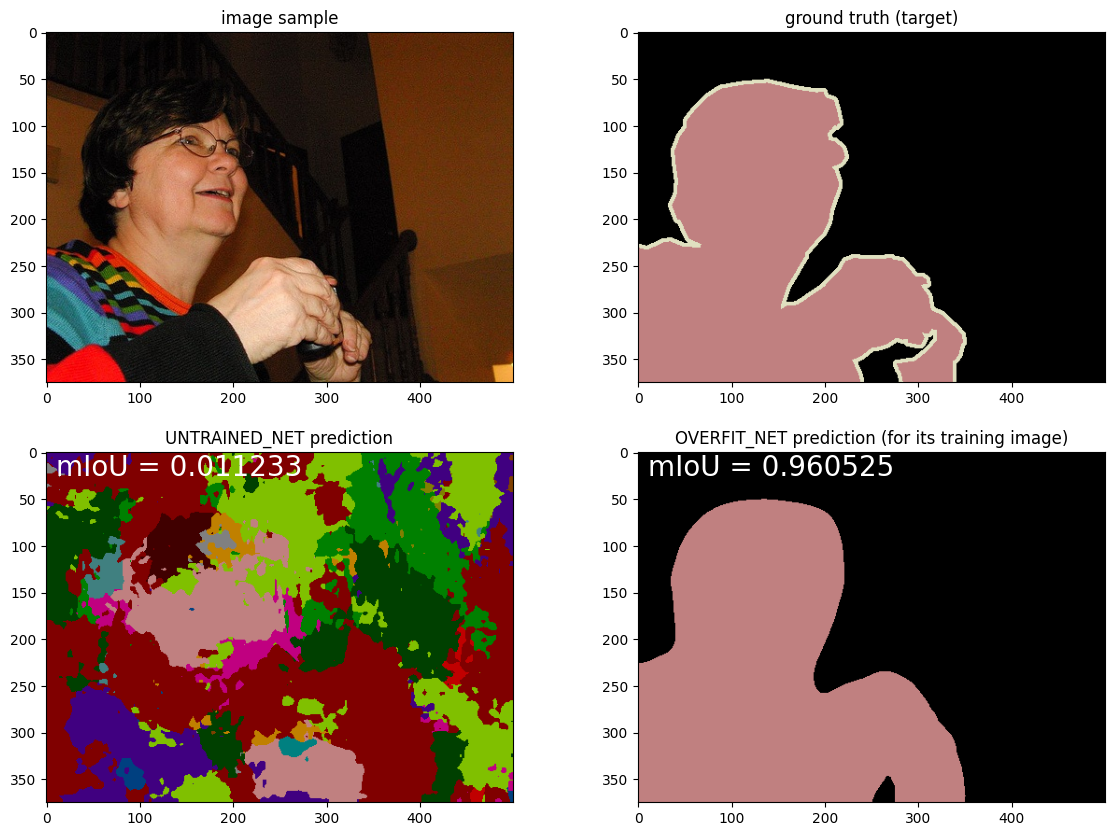

In [31]:
# switch back to evaluation mode
overfit_net.eval()

sample_img, sample_target = JointNormalize(*norm)(*JointToTensor()(*sample1))
if USE_GPU:
    sample_img = sample_img.cuda()
sample_output_O = overfit_net.forward(sample_img[None])
sample_output_U = untrained_net.forward(sample_img[None])

# computing mIOU (quantitative measure of accuracy for network predictions)
if USE_GPU:
    pred_O = torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]
    pred_U = torch.argmax(sample_output_U, dim=1).cpu().numpy()[0]
else:
    pred_O = torch.argmax(sample_output_O, dim=1).numpy()[0]
    pred_U = torch.argmax(sample_output_U, dim=1).numpy()[0]

gts = torch.from_numpy(np.array(sample1[1].convert('P'), dtype=np.int32)).long().numpy()
gts[gts == 255] = -1
conf_O = eval_semantic_segmentation(pred_O[None], gts[None])
conf_U = eval_semantic_segmentation(pred_U[None], gts[None])


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
plt.title('image sample')
ax1.imshow(sample1[0])
ax2 = fig.add_subplot(2,2,2)
plt.title('ground truth (target)')
ax2.imshow(sample1[1])
ax3 = fig.add_subplot(2,2,3)
plt.title('UNTRAINED_NET prediction')
ax3.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_U['miou']), fontsize=20, color='white')
ax3.imshow(colorize_mask(torch.argmax(sample_output_U, dim=1).cpu().numpy()[0]))
ax4 = fig.add_subplot(2,2,4)
plt.title('OVERFIT_NET prediction (for its training image)')
ax4.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_O['miou']), fontsize=20, color='white')
ax4.imshow(colorize_mask(torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]))

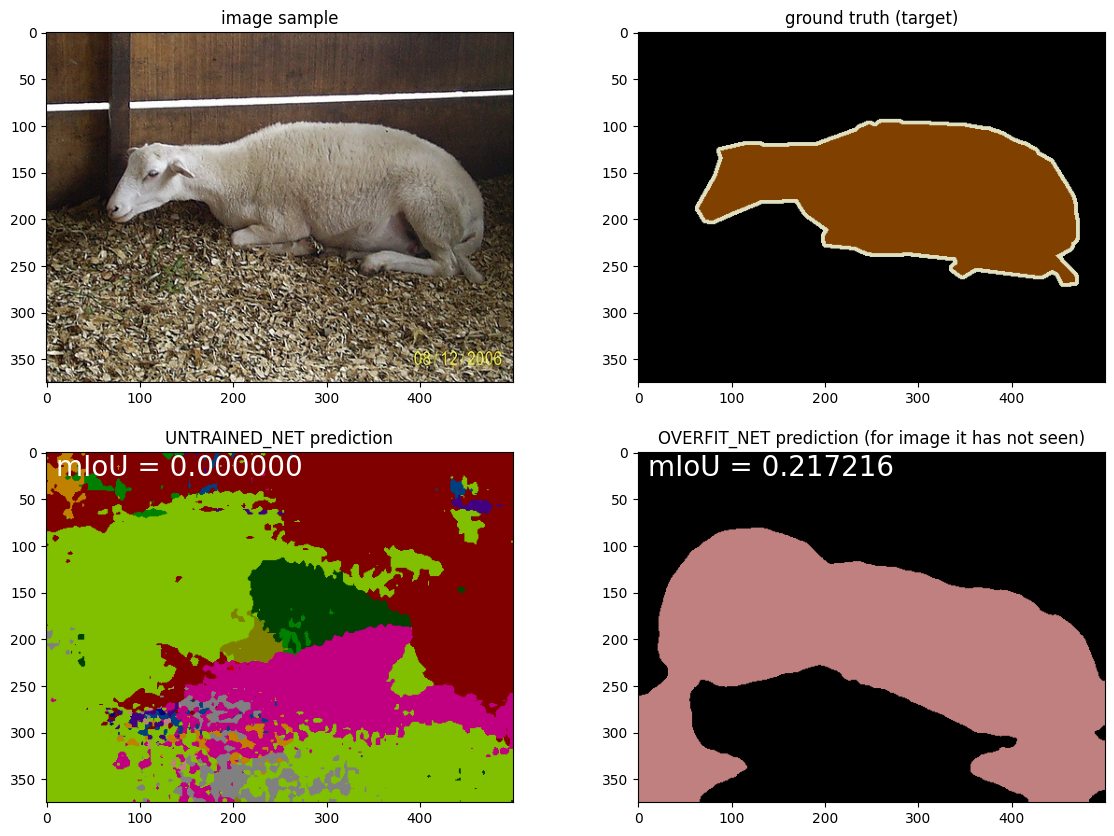

In [32]:
sample_img, sample_target = JointNormalize(*norm)(*JointToTensor()(*sample2))
if USE_GPU:
    sample_img = sample_img.cuda()
sample_output_O = overfit_net.forward(sample_img[None])
sample_output_U = untrained_net.forward(sample_img[None])

# computing mIOU (quantitative measure of accuracy for network predictions)
if USE_GPU:
    pred_O = torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]
    pred_U = torch.argmax(sample_output_U, dim=1).cpu().numpy()[0]
else:
    pred_O = torch.argmax(sample_output_O, dim=1).numpy()[0]
    pred_U = torch.argmax(sample_output_U, dim=1).numpy()[0]

gts = torch.from_numpy(np.array(sample2[1].convert('P'), dtype=np.int32)).long().numpy()
gts[gts == 255] = -1
conf_O = eval_semantic_segmentation(pred_O[None], gts[None])
conf_U = eval_semantic_segmentation(pred_U[None], gts[None])

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
plt.title('image sample')
ax1.imshow(sample2[0])
ax2 = fig.add_subplot(2,2,2)
plt.title('ground truth (target)')
ax2.imshow(sample2[1])
ax3 = fig.add_subplot(2,2,3)
plt.title('UNTRAINED_NET prediction')
ax3.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_U['miou']), fontsize=20, color='white')
ax3.imshow(colorize_mask(torch.argmax(sample_output_U, dim=1).cpu().numpy()[0]))
ax4 = fig.add_subplot(2,2,4)
plt.title('OVERFIT_NET prediction (for image it has not seen)')
ax4.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_O['miou']), fontsize=20, color='white')
ax4.imshow(colorize_mask(torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]))

#### Run the validation loop for OVERFIT_NET against the sanity dataset (an image it was trained on) - fully implemented

In [33]:
%%time
print("mIoU for OVERFIT_NET over its training image:{}".format(validate(sanity_loader, overfit_net)[1]))

mIoU for OVERFIT_NET over its training image:0.9605254867227817
CPU times: user 25.7 ms, sys: 985 µs, total: 26.7 ms
Wall time: 30 ms


### WARNING: For the remaining part of the assignment (below) it is advisable to switch to GPU mode as running each validation and training loop on the whole training set takes over an hour on CPU (there are several such loops below). Note that GPU mode is helpful only if you have a sufficiently good NVIDIA gpu (not older than 2-3 years) and cuda installed on your computer. If you do not have a sufficiently good graphics card available, you can still finish the remaining part in CPU mode (takes a few hours), as the cells below are mostly implemented and test your code written and debugged in the earlier parts above. You can also switch to Google Colaboratory to run the remaining parts below.

### You can use validation-data experiments below to tune your hyper-parameters. Normally, validation data is used exactly for this purpose. For actual competitions, testing data is not public and you can not tune hyper-parameters on in.

#### (d) Evaluate UNTRAINED_NET and OVERFIT_NET on validation dataset.
##### Run the validation loop for UNTRAINED_NET against the validation dataset:

In [34]:
%%time
# This will be slow on CPU (around 1 hour or more). On GPU it should take only a few minutes (depending on your GPU).
print("mIoU for UNTRAINED_NET over the entire dataset:{}".format(validate(val_loader, untrained_net)[1]))

mIoU for UNTRAINED_NET over the entire dataset:0.00204117125321657
CPU times: user 36.1 s, sys: 394 ms, total: 36.4 s
Wall time: 36.7 s


##### Run the validation loop for OVERFIT_NET against the validation dataset (it has not seen):

In [35]:
%%time
# This will be slow on CPU (around 1 hour or more). On GPU it should take only a few minutes (depending on your GPU).
print("mIoU for OVERFIT_NET over the validation dataset:{}".format(validate(val_loader, overfit_net)[1]))

mIoU for OVERFIT_NET over the validation dataset:0.1872021754627375
CPU times: user 38 s, sys: 206 ms, total: 38.2 s
Wall time: 38.5 s


#### (e) Explain in a few sentences the quantitative results observed in (c) and (d):

Student answer: Although the untrained network has trained layers from the resnet model, the subsequent layers are with untrained, random weights and biases hence the output from the model would be highly random. Thus, mIoU for the validation set of the untrained network is very poor. The overfit network is trained using one photo, and although it is trained only for the one person, it would have better probability of detecting people similar, hence the mIoU is higher at 18.7%.

#### (f) Create TRAINED_NET and train it on the full training dataset:

In [37]:
%%time
%matplotlib notebook

# This training will be very slow on a CPU (>1hour per epoch). Ideally, this should be run in GPU mode (USE_GPU=True)
# taking only a few minutes per epoch (depending on your GPU and batch size). Thus, before proceeding with this excercise,
# it is highly advisable that you first finish debugging your net code. In particular, make sure that OVERFIT_NET behaves
# reasonably, e.g. its loss monotonically decreases during training and its output is OK (for the image it was trained on).
# Below we create another (deep) copy of untrained_net. Unlike OVERFIT_NET it will be trained on a full training dataset.
trained_net = copy.deepcopy(untrained_net)

# set loss function for the net
trained_net.criterion = nn.CrossEntropyLoss(ignore_index=255)
#trained_net.criterion = MyCrossEntropyLoss(ignore_index=255)


# You can change the number of EPOCHS below. Since each epoch for TRAINED_NET iterates over all training dataset images,
# the number of required epochs could be smaller compared to OFERFIT_NET where each epoch iterates over one-image-dataset)
EPOCH = 10

# switch to train mode (original untrained_net was set to eval mode)
trained_net.train()

optimizer = get_optimizer(trained_net)

print("Starting Training...")

loss_graph = []

fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(bottom=0.2,right=0.85,top=0.95)
ax = fig.add_subplot(1,1,1)

for e in range(EPOCH):
    loss = train(train_loader, trained_net, optimizer, loss_graph)
    ax.clear()
    ax.set_xlabel('iterations')
    ax.set_ylabel('loss value')
    ax.set_title('Training loss curve for TRAINED_NET')
    ax.plot(loss_graph, label='training loss')
    ax.legend(loc='upper right')
    fig.canvas.draw()
    print("Epoch: {} Loss: {}".format(e, loss))

%matplotlib inline

Starting Training...


<IPython.core.display.Javascript object>

Epoch: 0 Loss: 0.701888382434845
Epoch: 1 Loss: 0.8447810411453247
Epoch: 2 Loss: 0.8173316121101379
Epoch: 3 Loss: 0.2773561477661133
Epoch: 4 Loss: 0.44187232851982117
Epoch: 5 Loss: 0.36488720774650574
Epoch: 6 Loss: 0.39477282762527466
Epoch: 7 Loss: 0.4653973877429962
Epoch: 8 Loss: 0.3057963252067566
Epoch: 9 Loss: 0.20331232249736786
CPU times: user 4min 52s, sys: 2.47 s, total: 4min 55s
Wall time: 4min 57s


#### (g) Qualitative and quantitative evaluation of predictions (OVERFIT_NET vs TRAINED_NET):

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

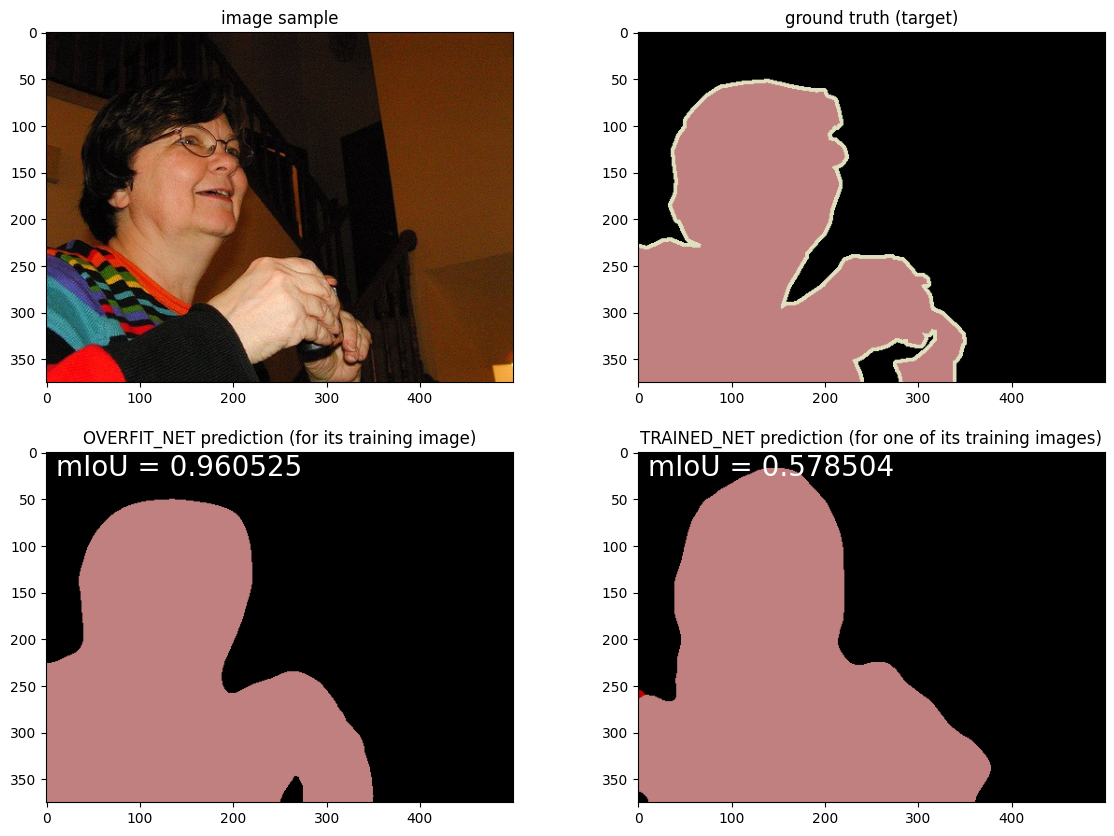

In [38]:
# switch back to evaluation mode
trained_net.eval()

sample_img, sample_target = JointNormalize(*norm)(*JointToTensor()(*sample1))
if USE_GPU:
    sample_img = sample_img.cuda()
sample_output_O = overfit_net.forward(sample_img[None])
sample_output_T = trained_net.forward(sample_img[None])

# computing mIOU (quantitative measure of accuracy for network predictions)
pred_T = torch.argmax(sample_output_T, dim=1).cpu().numpy()[0]
pred_O = torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]
gts = torch.from_numpy(np.array(sample1[1].convert('P'), dtype=np.int32)).long().numpy()
gts[gts == 255] = -1
conf_T = eval_semantic_segmentation(pred_T[None], gts[None])
conf_O = eval_semantic_segmentation(pred_O[None], gts[None])


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
plt.title('image sample')
ax1.imshow(sample1[0])
ax2 = fig.add_subplot(2,2,2)
plt.title('ground truth (target)')
ax2.imshow(sample1[1])
ax3 = fig.add_subplot(2,2,3)
plt.title('OVERFIT_NET prediction (for its training image)')
ax3.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_O['miou']), fontsize=20, color='white')
ax3.imshow(colorize_mask(torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]))
ax4 = fig.add_subplot(2,2,4)
plt.title('TRAINED_NET prediction (for one of its training images)')
ax4.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_T['miou']), fontsize=20, color='white')
ax4.imshow(colorize_mask(torch.argmax(sample_output_T, dim=1).cpu().numpy()[0]))

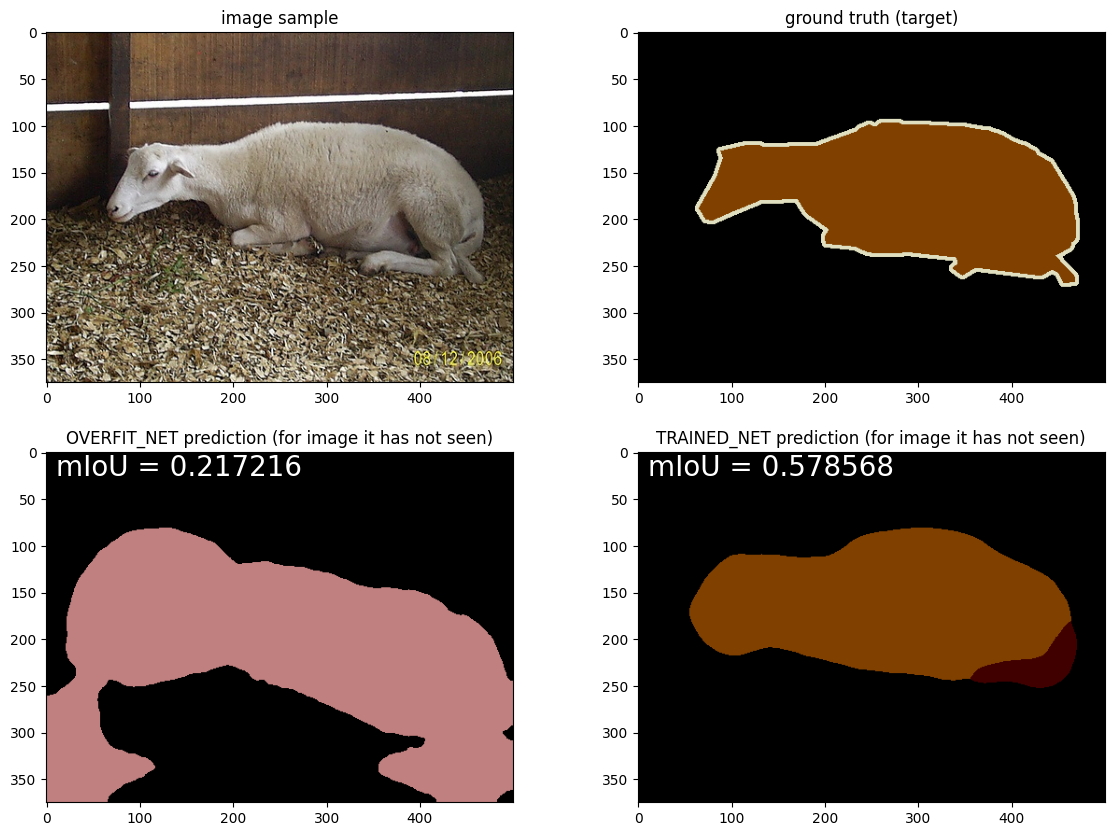

In [39]:
sample_img, sample_target = JointNormalize(*norm)(*JointToTensor()(*sample2))
if USE_GPU:
    sample_img = sample_img.cuda()
sample_output_O = overfit_net.forward(sample_img[None])
sample_output_T = trained_net.forward(sample_img[None])

# computing mIOU (quantitative measure of accuracy for network predictions)
pred_O = torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]
pred_T = torch.argmax(sample_output_T, dim=1).cpu().numpy()[0]
gts = torch.from_numpy(np.array(sample2[1].convert('P'), dtype=np.int32)).long().numpy()
gts[gts == 255] = -1
conf_O = eval_semantic_segmentation(pred_O[None], gts[None])
conf_T = eval_semantic_segmentation(pred_T[None], gts[None])


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
plt.title('image sample')
ax1.imshow(sample2[0])
ax2 = fig.add_subplot(2,2,2)
plt.title('ground truth (target)')
ax2.imshow(sample2[1])
ax3 = fig.add_subplot(2,2,3)
plt.title('OVERFIT_NET prediction (for image it has not seen)')
ax3.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_O['miou']), fontsize=20, color='white')
ax3.imshow(colorize_mask(torch.argmax(sample_output_O, dim=1).cpu().numpy()[0]))
ax4 = fig.add_subplot(2,2,4)
plt.title('TRAINED_NET prediction (for image it has not seen)')
ax4.text(10, 25, 'mIoU = {:_>8.6f}'.format(conf_T['miou']), fontsize=20, color='white')
ax4.imshow(colorize_mask(torch.argmax(sample_output_T, dim=1).cpu().numpy()[0]))

#### (h) Evaluate TRAINED_NET on validation dataset.
##### Run the validation loop for TRAINED_NET against the validation dataset (it has not seen):

In [40]:
%%time
# This will be slow on CPU (around 1 hour). On GPU it should take only a few minutes (depending on your GPU).
print("mIoU for TRAINED_NET over the validation dataset:{}".format(validate(val_loader, trained_net)[1]))

mIoU for TRAINED_NET over the validation dataset:0.4653332872252961
CPU times: user 36.2 s, sys: 255 ms, total: 36.5 s
Wall time: 36.7 s


# Problem 6

#### For the network that you implemented, write a paragraph or two about limitations / bottlenecks about the work. What could be improved? What seems to be some obvious issues with the existing works?

Resnet-18 is used to allow for faster training given it is a smaller model. Using larger versions of the resnet model has the potential of improving the results. Additionally, due to limitations in computational capability, the network is made to be smaller. However need to ensure there aren't too many parameters such that the model would overfit. Upsampling is beneficial in preserving information, but they increase complexity, add noise, and are sensitive with tuning. Although we could benefit with upsampling similar to the U network presented in class, it adds too much complexity which is likely out of scope for this assignment. For the assignmnet, the number of epochs were limited to reduce time required for training, however there is the potential of increasing it to reach the convergence value.